In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('prod_with_chem.csv')
df

,Unnamed: 0,name,mfg,num_chem,chem,price,category
0,0,shape tape concealer,tarte,2,"['fragrance', 'parfum']",27.0,Face
1,0,cc+ cream with spf 50+,it cosmetics,1,['steareth'],39.5,Face
2,0,double wear stay-in-place makeup,estée lauder,1,['laureth'],43.0,Face
3,0,born this way undetectable medium-to-full cove...,too faced,0,[],39.0,Face
4,0,translucent loose setting powder,laura mercier,5,"['methylparaben', 'propylparaben', 'ethylparab...",39.0,Face
...,...,...,...,...,...,...,...
6977,0,clear lash adhesive,house of lashes,0,[],8.0,Eyes
6978,0,miami lights glitter palette,nabla,0,[],25.0,By Category
6979,0,lash freak volumizing & lengthening mascara,urban decay cosmetics,1,['steareth'],25.0,Eyes
6980,0,classic brush tip liner,ulta,0,[],9.0,ULTA Collection


# hypothesis testing - chems per brand - Moist
### luxury brands will have less cancer causing chemicals per product than basic

In [3]:
df1 = df[df['category'].isin(['Body Moisturizers', 'Moisturizers', 'Skin', 'Skin Care', 'Suncare', 'Treatment & Serums']) ]
df1.head(50)

,Unnamed: 0,name,mfg,num_chem,chem,price,category
39,0,pretty fresh hyaluronic acid tinted moisturizer,colourpop,1,['polysorbate'],14.00,Moisturizers
72,0,"facial spray with aloe, cucumber and green tea",mario badescu,3,"['polysorbate', 'fragrance', 'parfum']",7.00,Moisturizers
214,0,"facial spray with aloe, chamomile and lavender",mario badescu,2,"['triethanolamine', 'polysorbate']",7.00,Moisturizers
226,0,sun protection mineral face powder spf 30,derma e,0,[],21.95,Suncare
338,0,true match lumi glotion natural glow enhancer,l'oréal,1,['laureth'],14.99,Moisturizers
339,0,prep set glow,iconic london,2,"['polysorbate', 'parfum']",25.00,Moisturizers
344,0,uv expert aquagel defense primer & moisturizer...,lancôme,2,"['oxybenzone', 'fragrance']",39.00,Moisturizers
350,0,hello fab coconut skin smoothie priming moistu...,first aid beauty,1,['polysorbate'],29.00,Moisturizers
467,0,anthelios 50 daily face primer with sunscreen ...,la roche-posay,1,['oxybenzone'],39.99,Moisturizers
513,0,mattify & protect daily priming lotion spf 35,pacifica,1,['parfum'],16.00,Moisturizers


In [4]:
df1 = df1.groupby('mfg').mean()
df1.head()

,Unnamed: 0,num_chem,price
mfg,,,
acure,0.0,0.142857,17.704286
ahava,0.0,2.320000,65.000000
alpha skin care,0.0,3.000000,17.190000
anastasia beverly hills,0.0,0.000000,45.000000
andalou naturals,0.0,0.047619,16.894762


Now we have a dataframe with only Moisturizers category grouped by mfg 

In [5]:
x = []

for num in range(len(df1['num_chem'])):
    x.append(df1['price'].iloc[num])

mean_ = (statistics.mean(x))
median_ = (statistics.mean(x))
print (statistics.mean(x))
print (statistics.median(x))
#checked to make sure that there was no significant diffrence between the two

29.929209415426495
24.75


In [6]:
basic = pd.DataFrame()
luxury = pd.DataFrame()


In [7]:
for x in range(len(df1['price'])):
    if df1['price'].iloc[x] >= mean_:
        luxury = luxury.append(df1.iloc[x])
    else:
        basic = basic.append(df1.iloc[x])
        

In [8]:
len(luxury)

88

In [9]:
len(basic)

132

In [10]:
lnum = luxury['num_chem'].tolist()
lprice = luxury['price'].tolist()

In [11]:
bnum = basic['num_chem'].tolist()
bprice = basic['price'].tolist()

[Text(0, 0, 'lux'), Text(0, 0, 'basic')]

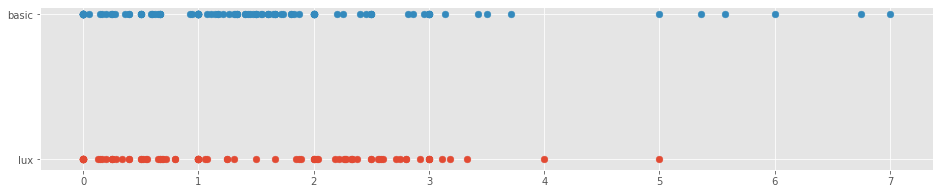

In [12]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(lnum, np.repeat(0, len(lnum)), s=45)
ax.scatter(bnum, np.repeat(1, len(bnum)), s =45)

ax.set_yticks([0, 1])
ax.set_yticklabels(["lux", "basic"])

[Text(0, 0, 'lux'), Text(0, 0, 'basic')]

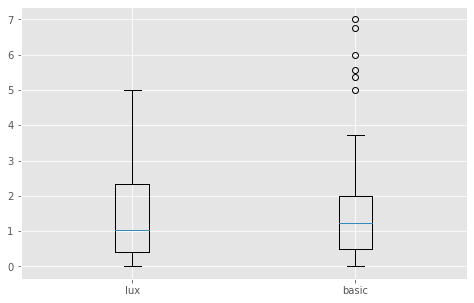

In [13]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([lnum, bnum])
ax.set_xticks([1,2])
ax.set_xticklabels(["lux", "basic"])

In [268]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [269]:
test_statistic = welch_test_statistic(lnum, bnum)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: -0.33


In [270]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [271]:
df = welch_satterhwaithe_df(lnum, bnum)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 206.51


Text(0.5, 1.0, "Distribution of Welsh's Test Statistic Under the Null Hypothesis")

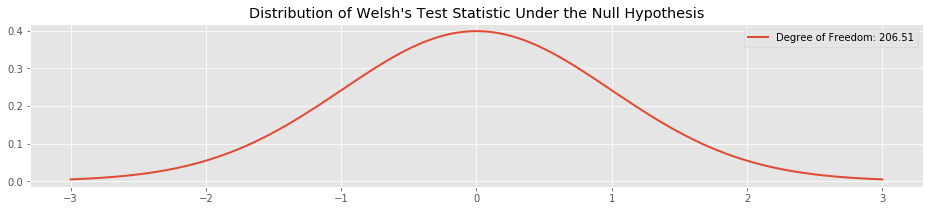

In [272]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
chemicals = stats.t(df)
ax.plot(x, chemicals.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis")

Text(0.5, 1.0, 'p-value Reigon')

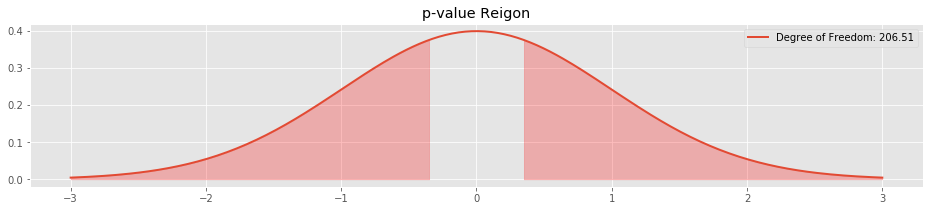

In [273]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
chemicals = stats.t(df)
ax.plot(x, chemicals.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
_ = ax.fill_between(x, chemicals.pdf(x), where=(x >= -test_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, chemicals.pdf(x), where=(x <= test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon")

In [274]:
p_value = chemicals.cdf(test_statistic) + (1 - chemicals.cdf(-test_statistic))
print("p-value for different average number of chemicals: {:2.4f}".format(p_value))

p-value for different average number of chemicals: 0.7410


p value is not less than .1 so I cannot reject null hypothesis